In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues = np.arange(0, maxk + 1) # possible values of k
    Pk = np.zeros(maxk + 1) # P(k)
    for k in vk:
        Pk[k] += 1
    Pk /= sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues, Pk


In [3]:
def geodesic_distance(G,source, target):
    try:
        geodesic_distance_between_clusters = nx.shortest_path_length(G, source, target)
    except nx.NetworkXNoPath:
        geodesic_distance_between_clusters = np.inf
    return geodesic_distance_between_clusters

In [4]:
def shannon_entropy(G):
    k, Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H -= p * math.log(p, 2)
    return H

In [5]:
def graph_diameter(G,e=None):
    if nx.is_connected(G):
        dmtr = nx.diameter(G,e=e)
    else:
        dmtr = np.inf
    return dmtr

In [6]:
def draw_tree(df, index=0, algorithm='bfs', depth_limit=None):
    depth_limit=len(df.graph_comm[index])
    if algorithm == 'bfs':
        tree = nx.bfs_tree(df.graph_comm[index], 
                           source = df.node_degree_centrality[index])
    if algorithm == 'dfs':
        tree = nx.dfs_tree(df.graph_comm[index], 
                           source = df.node_degree_centrality[index], 
                           depth_limit = depth_limit)
        
    positions = nx.drawing.nx_agraph.graphviz_layout(tree, prog="dot")
    nx.draw(tree, positions, with_labels=True)

In [7]:
A = nx.Graph([(0,1),(2, 5),(1, 2), (1, 3), (1, 4), (3, 4), (3, 5), (4, 5),(5, 30),(30, 31),(31, 32)])
B = nx.Graph([(10,11),(11,12),(11,13),(11,14),(11,15),(11,16),(11,17),(11,12),(11,19),(11,20),(11,21),(21,22),(21,23),(21,24),(21,25),(21,26)])
C = nx.Graph([(7, 8), (7, 9), (7, 10), (10, 1)])
G = nx.Graph([(26,11),(1, 2), (1, 3), (1, 4), (3, 4), (3, 5), (4, 5),
                 (11,12),(11,13),(11,14),(11,15),(11,16),(11,17),(11,12),(11,19),(11,20),(11,21),(21,22),(21,23),(21,24),(21,25),(21,26),
                 (7, 8), (7, 9), (7, 10), (10, 1),(2, 5),(0,1)])

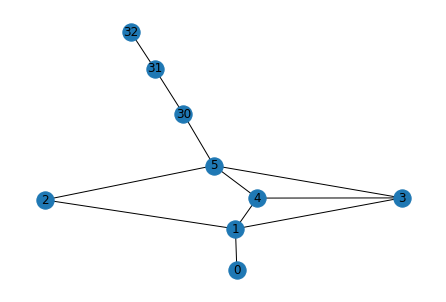

In [8]:
nx.draw(A, with_labels=True)
plt.show()

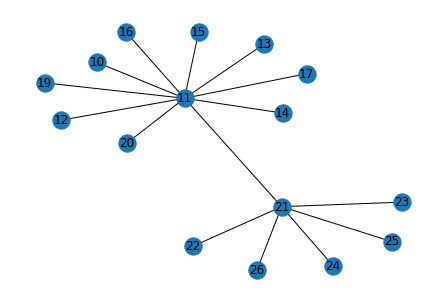

In [9]:
nx.draw(B, with_labels=True)
plt.show()

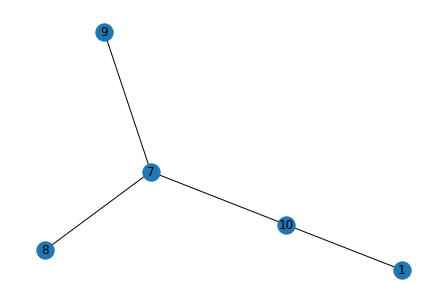

In [10]:
nx.draw(C, with_labels=True)
plt.show()

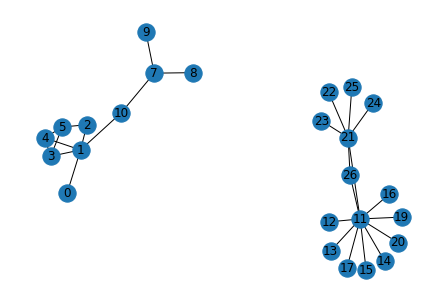

In [11]:
nx.draw_spring(G, with_labels=True)
plt.show()

In [12]:
list(nx.chain_decomposition(A,root=1))

[[(1, 3), (3, 5), (5, 2), (2, 1)], [(1, 4), (4, 3)], [(5, 4)]]

In [13]:
comms=[A,B,C]

In [14]:
df_consolidate_clusters = pd.DataFrame()

len_comm_list = []
nodes_comm_list = []
graph_comm_list = []
degree_centrality_list = []
geodesic_distance_list = []
bridges_list = []
shannon_list = []
graph_diameter_list = []

for comm in comms:
    # number of nodes in a cluster
    len_comm_list.append(comm.number_of_nodes())
    
    # list of nodes in a cluster
    nodes_comm_list.append(list(comm.nodes()))
    
    # NetworkX cluster object
    graph_comm_list.append(comm)
    
    # The first node in a list of nodes 
    # with the highest degree. There may be 
    # nodes with the same degree. 
    # selection in an "arbitrary" way.
    degree_centrality = nx.degree_centrality(comm)
    center = list({k: v for k, v in sorted(degree_centrality.items(), 
                                           key=lambda item: item[1], 
                                           reverse=True)}.keys())[0]
    degree_centrality_list.append(center)
    
    # The graph diameter. If comm is unconnected, this function
    # returns np.inf
    graph_diameter_list.append(graph_diameter(comm))
 
    # bridges
    # https://networkx.org/documentation/stable/reference/algorithms/
    # generated/networkx.algorithms.bridges.bridges.html
    if nx.has_bridges(comm) is True: 
        bridges_list.append(list(nx.bridges(comm)))
    else:
        bridges_list.append(np.nan)
        
    # Shannon entropy
    shannon_list.append(shannon_entropy(comm))
    
    
for i in degree_centrality_list:
    dict_distances = {}
    aux_list = degree_centrality_list.copy()
    aux_list.remove(i)
    for j in aux_list:
        dict_distances[j]=geodesic_distance(G,i,j)
    geodesic_distance_list.append(dict_distances)
    
df_consolidate_clusters['len_comm'] = len_comm_list
df_consolidate_clusters['nodes_comm'] = nodes_comm_list
df_consolidate_clusters['graph_comm'] = graph_comm_list
df_consolidate_clusters['node_degree_centrality'] = degree_centrality_list
df_consolidate_clusters['diameter'] = graph_diameter_list
df_consolidate_clusters['geodesic_distance'] = geodesic_distance_list
df_consolidate_clusters['bridges'] = bridges_list
df_consolidate_clusters['shannon_entropy'] = shannon_list


In [15]:
df_consolidate_clusters

,len_comm,nodes_comm,graph_comm,node_degree_centrality,diameter,geodesic_distance,bridges,shannon_entropy
0,9,"[0, 1, 2, 5, 3, 4, 30, 31, 32]","(0, 1, 2, 5, 3, 4, 30, 31, 32)",1,6,"{11: inf, 7: 2}","[(0, 1), (5, 30), (30, 31), (31, 32)]",1.974938
1,16,"[10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 2...","(10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 2...",11,3,"{1: inf, 7: inf}","[(10, 11), (11, 12), (11, 13), (11, 14), (11, ...",0.668564
2,5,"[7, 8, 9, 10, 1]","(7, 8, 9, 10, 1)",7,3,"{1: 2, 11: inf}","[(7, 8), (7, 9), (7, 10), (10, 1)]",1.370951


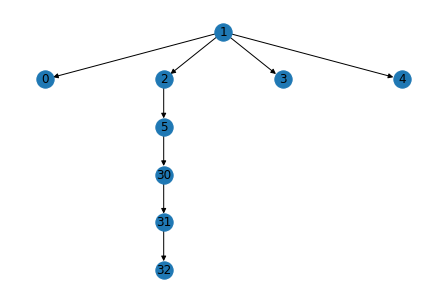

In [16]:
draw_tree(df_consolidate_clusters, 0)

In [17]:
shannon_entropy(A)

1.974937501201927

In [18]:
shannon_entropy(B)

0.6685644431995964

In [19]:
graph_diameter(C)

3

In [20]:
list(nx.bridges(A))

[(0, 1), (5, 30), (30, 31), (31, 32)]

In [21]:
servico_negocio= ["Serviço comprar laranja",
                  "Serviço arrumar o quarto",
                  "Serviço Tirar sonequinha",
                  "Serviço Fazer docinho",
                  "Serviço tocar musica"]

In [22]:
oferta_servico= ["comprar laranja",
                 "arrumar o quarto",
                 "Tirar sonequinha",
                 "Tirar cochileta",
                 "Fazer brigadeiro",
                 "Fazer beijinho",
                 "tocar ukulele",
                 "tocar cavaquinho"]

In [23]:
sigla = ["AB3","RT5","GT0","SS3","XP1","CS9"]

In [24]:
ic = ["XPTO4576","XPTO1122","XPTO3465","XPTO8879","XPTO5545","XPTO1100","XPTO9999","XPTO1127","XPTO7714"]

In [25]:
diretoria=["Qualidade do Sono","Qualidade do papá","Qualidade da musica"]

In [76]:
comunidade=["doceiros","musicos","cansados"]

In [73]:
target_dir=["Qualidade do papá",
           "Qualidade do Sono",
           "Qualidade do Sono",
           "Qualidade do Sono",
           "Qualidade do papá",
           "Qualidade do papá",
           "Qualidade da musica",
           "Qualidade da musica"]

dict_dir = dict(zip(oferta_servico, target_dir))

In [74]:
target_com=["doceiros",
            "cansados",
            "cansados",
            "cansados",
            "doceiros",
            "doceiros",
            "musicos",
            "musicos"]

dict_com = dict(zip(oferta_servico, target_com))

In [120]:
source=["Serviço comprar laranja",
        "Serviço arrumar o quarto",
        "Serviço Tirar sonequinha",
        "Serviço Tirar sonequinha",
        "Serviço Fazer docinho",
        "Serviço Fazer docinho",
        "Serviço tocar musica",
        "Serviço tocar musica",
        "Serviço tocar musica",
        "comprar laranja",
        "arrumar o quarto",
        "Tirar sonequinha",
        "Tirar cochileta",
        "Fazer brigadeiro",
        "Fazer beijinho",
        "tocar ukulele",
        "tocar cavaquinho",
        "tocar sanfona",
        "XPTO4576",
        "XPTO1122",
        "XPTO3465",
        "XPTO3465",
        "XPTO8879",
        "XPTO5545",
        "XPTO1100",
        "XPTO9999",
        "XPTO1127",
        "XPTO7714",
        "XPTO9999"]

In [121]:
target=["comprar laranja",
        "arrumar o quarto",
        "Tirar sonequinha",
        "Tirar cochileta",
        "Fazer brigadeiro",
        "Fazer beijinho",
        "tocar ukulele",
        "tocar cavaquinho",
        "tocar sanfona",
        "AB3",
        "RT5",
        "GT0",
        "GT0",
        "SS3",
        "XP1",
        "CS9",
        "XP1",
        "CS9",
        "AB3",
        "AB3",
        "RT5",
        "GT0",
        "GT0",
        "SS3",
        "CS9",
        "CS9",
        "CS9",
        "XP1",
        "SS3"]

In [122]:
len(source)

29

In [123]:
len(target)

29

In [124]:
G = nx.Graph()

In [125]:
G.add_nodes_from(sigla, node_type="sigla")
G.add_nodes_from(servico_negocio, node_type="servico_negocio")
G.add_nodes_from(oferta_servico, node_type="oferta_servico")
G.add_nodes_from(ic,node_type="ic")

In [126]:
for i in range(len(source)): G.add_edge(source[i],target[i])

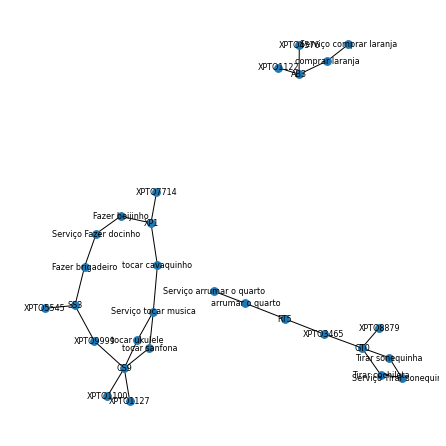

In [127]:
plt.figure(figsize=(6,6)) 
nx.draw_spring(G, with_labels=True,node_size=60,font_size=8)
plt.show()

In [128]:
import community as community_louvain

In [145]:
partition = community_louvain.best_partition(G, random_state=23)

In [146]:
nx.set_node_attributes(G,partition,"louvain")
nx.set_node_attributes(G,dict_dir,"diretoria")
nx.set_node_attributes(G,dict_com,"comunidade")

In [147]:
G.nodes(data=True)

NodeDataView({'AB3': {'node_type': 'sigla', 'louvain': 0}, 'RT5': {'node_type': 'sigla', 'louvain': 1}, 'GT0': {'node_type': 'sigla', 'louvain': 2}, 'SS3': {'node_type': 'sigla', 'louvain': 4}, 'XP1': {'node_type': 'sigla', 'louvain': 4}, 'CS9': {'node_type': 'sigla', 'louvain': 3}, 'Serviço comprar laranja': {'node_type': 'servico_negocio', 'louvain': 0}, 'Serviço arrumar o quarto': {'node_type': 'servico_negocio', 'louvain': 1}, 'Serviço Tirar sonequinha': {'node_type': 'servico_negocio', 'louvain': 2}, 'Serviço Fazer docinho': {'node_type': 'servico_negocio', 'louvain': 4}, 'Serviço tocar musica': {'node_type': 'servico_negocio', 'louvain': 3}, 'comprar laranja': {'node_type': 'oferta_servico', 'louvain': 0, 'diretoria': 'Qualidade do papá', 'comunidade': 'doceiros'}, 'arrumar o quarto': {'node_type': 'oferta_servico', 'louvain': 1, 'diretoria': 'Qualidade do Sono', 'comunidade': 'cansados'}, 'Tirar sonequinha': {'node_type': 'oferta_servico', 'louvain': 2, 'diretoria': 'Qualidade d

In [148]:
df_consolidated_cluster = pd.DataFrame()

cluster_graphs_list = []
index_cluster_list = []
len_cluster_list = []
dir_list = []
com_list = []

for index_cluster in np.unique(list(nx.get_node_attributes(G,"louvain").values())):
    index_cluster_list.append(index_cluster)
    
    target_cluster = G.subgraph([x for x,y in G.nodes(data=True) if y['louvain']==index_cluster]).copy()
    cluster_graphs_list.append(target_cluster)
    
    len_cluster_list.append(target_cluster.number_of_nodes())
    
    dir_list.append(list(np.unique(list(nx.get_node_attributes(target_cluster,"diretoria").values()))))
    
    com_list.append(list(np.unique(list(nx.get_node_attributes(target_cluster,"comunidade").values()))))
    
    
df_consolidated_cluster["index_cluster"] = index_cluster_list
df_consolidated_cluster["len_cluster"] = len_cluster_list
df_consolidated_cluster["diretoria_cluster"] = dir_list
df_consolidated_cluster["comunidade_cluster"] = com_list

    
df_consolidated_cluster   

,index_cluster,len_cluster,diretoria_cluster,comunidade_cluster
0,0,5,[Qualidade do papá],[doceiros]
1,1,4,[Qualidade do Sono],[cansados]
2,2,5,[Qualidade do Sono],[cansados]
3,3,6,[Qualidade da musica],[musicos]
4,4,9,"[Qualidade da musica, Qualidade do papá]","[doceiros, musicos]"


In [167]:
df_consolidate_clusters = pd.DataFrame()

index_cluster_list = []
len_comm_list = []
nodes_comm_list = []
graph_comm_list = []
degree_centrality_list = []
geodesic_distance_list = []
bridges_list = []
shannon_list = []
graph_diameter_list = []
dir_list = []
com_list = []

for index_cluster in np.unique(list(nx.get_node_attributes(G,"louvain").values())):
    
    index_cluster_list.append(index_cluster)
    comm = G.subgraph([x for x,y in G.nodes(data=True) if y['louvain']==index_cluster]).copy()
    
    # number of nodes in a cluster
    len_comm_list.append(comm.number_of_nodes())
    
    # list of nodes in a cluster
    nodes_comm_list.append(list(comm.nodes()))
    
    # NetworkX cluster object
    graph_comm_list.append(comm)
    
    # The first node in a list of nodes 
    # with the highest degree. There may be 
    # nodes with the same degree. 
    # selection in an "arbitrary" way.
    degree_centrality = nx.degree_centrality(comm)
    center = list({k: v for k, v in sorted(degree_centrality.items(), 
                                           key=lambda item: item[1], 
                                           reverse=True)}.keys())[0]
    degree_centrality_list.append(center)
    
    # The graph diameter. If comm is unconnected, this function
    # returns np.inf
    graph_diameter_list.append(graph_diameter(comm))
 
    # bridges
    # https://networkx.org/documentation/stable/reference/algorithms/
    # generated/networkx.algorithms.bridges.bridges.html
    if nx.has_bridges(comm) is True: 
        bridges_list.append(list(nx.bridges(comm)))
    else:
        bridges_list.append(np.nan)
        
    # Shannon entropy
    shannon_list.append(shannon_entropy(comm))
    
    # diretoria from cluster
    dir_list.append(list(np.unique(list(nx.get_node_attributes(comm,"diretoria").values()))))
    
    # comunidades from cluster
    com_list.append(list(np.unique(list(nx.get_node_attributes(comm,"comunidade").values()))))
    
    
for i in degree_centrality_list:
    dict_distances = {}
    aux_list = degree_centrality_list.copy()
    aux_list.remove(i)
    for j in aux_list:
        dict_distances[j]=geodesic_distance(G,i,j)
    geodesic_distance_list.append(dict_distances)
    
df_consolidate_clusters["id_cluster"] = index_cluster_list
df_consolidate_clusters['len_cluster'] = len_comm_list
df_consolidate_clusters['nodes_cluster'] = nodes_comm_list
df_consolidate_clusters['graph_cluster'] = graph_comm_list
df_consolidate_clusters["diretoria_cluster"] = dir_list
df_consolidate_clusters["comunidade_cluster"] = com_list
df_consolidate_clusters['node_degree_centrality'] = degree_centrality_list
df_consolidate_clusters['diameter'] = graph_diameter_list
df_consolidate_clusters['geodesic_distance'] = geodesic_distance_list
#df_consolidate_clusters['bridges'] = bridges_list
df_consolidate_clusters['shannon_entropy'] = shannon_list

In [168]:
df_consolidate_clusters

,id_cluster,len_cluster,nodes_cluster,graph_cluster,diretoria_cluster,comunidade_cluster,node_degree_centrality,diameter,geodesic_distance,shannon_entropy
0,0,5,"[XPTO4576, Serviço comprar laranja, comprar la...","(XPTO4576, Serviço comprar laranja, comprar la...",[Qualidade do papá],[doceiros],AB3,3,"{'RT5': inf, 'GT0': inf, 'CS9': inf, 'SS3': inf}",1.370951
1,1,4,"[XPTO3465, RT5, Serviço arrumar o quarto, arru...","(XPTO3465, RT5, Serviço arrumar o quarto, arru...",[Qualidade do Sono],[cansados],RT5,3,"{'AB3': inf, 'GT0': 2, 'CS9': inf, 'SS3': inf}",1.000000
2,2,5,"[Tirar cochileta, XPTO8879, GT0, Serviço Tirar...","(Tirar cochileta, XPTO8879, GT0, Serviço Tirar...",[Qualidade do Sono],[cansados],GT0,3,"{'AB3': inf, 'RT5': 2, 'CS9': inf, 'SS3': inf}",1.370951
3,3,6,"[CS9, tocar ukulele, XPTO1127, Serviço tocar m...","(CS9, tocar ukulele, XPTO1127, Serviço tocar m...",[Qualidade da musica],[musicos],CS9,3,"{'AB3': inf, 'RT5': inf, 'GT0': inf, 'SS3': 2}",1.459148
4,4,9,"[Serviço Fazer docinho, SS3, tocar cavaquinho,...","(Serviço Fazer docinho, SS3, tocar cavaquinho,...","[Qualidade da musica, Qualidade do papá]","[doceiros, musicos]",SS3,6,"{'AB3': inf, 'RT5': inf, 'GT0': inf, 'CS9': 2}",1.530493


In [176]:
df_diretoria = pd.DataFrame(columns=["id_cluster","diretoria"])
df_comunidade = pd.DataFrame(columns=["id_cluster","comunidade"])

for i in range(df_consolidate_clusters.shape[0]): 
    target_dir_list = df_consolidate_clusters.diretoria_cluster[i]
    target_com_list = df_consolidate_clusters.comunidade_cluster[i]
    for tdir in range(len(target_dir_list)):
        new_row = {'id_cluster':i, 'diretoria':target_dir_list[tdir]}
        df_diretoria = df_diretoria.append(new_row, ignore_index=True)
    for tcom in range(len(target_com_list)):
        new_row = {'id_cluster':i, 'comunidade':target_com_list[tcom]}
        df_comunidade = df_comunidade.append(new_row, ignore_index=True)

In [185]:
df_diretoria.to_csv('diretoria.csv')

In [184]:
df_comunidade.to_csv('comunidade.csv')

In [183]:
df_consolidate_clusters.drop(['nodes_cluster','graph_cluster'],axis=1).to_csv('df_consolidate_clusters.csv')

In [191]:
list(np.sort(df_comunidade.comunidade.unique()))

['cansados', 'doceiros', 'musicos']

In [192]:
df_consolidate_clusters

,id_cluster,len_cluster,nodes_cluster,graph_cluster,diretoria_cluster,comunidade_cluster,node_degree_centrality,diameter,geodesic_distance,shannon_entropy
0,0,5,"[XPTO4576, Serviço comprar laranja, comprar la...","(XPTO4576, Serviço comprar laranja, comprar la...",[Qualidade do papá],[doceiros],AB3,3,"{'RT5': inf, 'GT0': inf, 'CS9': inf, 'SS3': inf}",1.370951
1,1,4,"[XPTO3465, RT5, Serviço arrumar o quarto, arru...","(XPTO3465, RT5, Serviço arrumar o quarto, arru...",[Qualidade do Sono],[cansados],RT5,3,"{'AB3': inf, 'GT0': 2, 'CS9': inf, 'SS3': inf}",1.000000
2,2,5,"[Tirar cochileta, XPTO8879, GT0, Serviço Tirar...","(Tirar cochileta, XPTO8879, GT0, Serviço Tirar...",[Qualidade do Sono],[cansados],GT0,3,"{'AB3': inf, 'RT5': 2, 'CS9': inf, 'SS3': inf}",1.370951
3,3,6,"[CS9, tocar ukulele, XPTO1127, Serviço tocar m...","(CS9, tocar ukulele, XPTO1127, Serviço tocar m...",[Qualidade da musica],[musicos],CS9,3,"{'AB3': inf, 'RT5': inf, 'GT0': inf, 'SS3': 2}",1.459148
4,4,9,"[Serviço Fazer docinho, SS3, tocar cavaquinho,...","(Serviço Fazer docinho, SS3, tocar cavaquinho,...","[Qualidade da musica, Qualidade do papá]","[doceiros, musicos]",SS3,6,"{'AB3': inf, 'RT5': inf, 'GT0': inf, 'CS9': 2}",1.530493


In [194]:
G.nodes(data=True)

NodeDataView({'AB3': {'node_type': 'sigla', 'louvain': 0}, 'RT5': {'node_type': 'sigla', 'louvain': 1}, 'GT0': {'node_type': 'sigla', 'louvain': 2}, 'SS3': {'node_type': 'sigla', 'louvain': 4}, 'XP1': {'node_type': 'sigla', 'louvain': 4}, 'CS9': {'node_type': 'sigla', 'louvain': 3}, 'Serviço comprar laranja': {'node_type': 'servico_negocio', 'louvain': 0}, 'Serviço arrumar o quarto': {'node_type': 'servico_negocio', 'louvain': 1}, 'Serviço Tirar sonequinha': {'node_type': 'servico_negocio', 'louvain': 2}, 'Serviço Fazer docinho': {'node_type': 'servico_negocio', 'louvain': 4}, 'Serviço tocar musica': {'node_type': 'servico_negocio', 'louvain': 3}, 'comprar laranja': {'node_type': 'oferta_servico', 'louvain': 0, 'diretoria': 'Qualidade do papá', 'comunidade': 'doceiros'}, 'arrumar o quarto': {'node_type': 'oferta_servico', 'louvain': 1, 'diretoria': 'Qualidade do Sono', 'comunidade': 'cansados'}, 'Tirar sonequinha': {'node_type': 'oferta_servico', 'louvain': 2, 'diretoria': 'Qualidade d

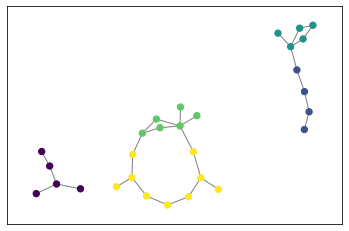

In [151]:
import matplotlib.cm as cm
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [150]:
oferta_servico

['comprar laranja',
 'arrumar o quarto',
 'Tirar sonequinha',
 'Tirar cochileta',
 'Fazer brigadeiro',
 'Fazer beijinho',
 'tocar ukulele',
 'tocar cavaquinho']

In [72]:
#for cluster in cluster_graphs:
#    plt.figure(figsize=(12,12)) 
#    nx.draw_spring(cluster, with_labels=True,node_size=60,font_size=8)
#    plt.show()

In [88]:
list(np.unique(list(nx.get_node_attributes(G,"comunidade").values())))

['cansados', 'doceiros', 'musicos']

In [195]:
for i in range(df_consolidate_clusters.shape[0]):
    nx.write_gpickle(df_consolidate_clusters.graph_cluster[i],f"clusters/{i}.pkl")

In [196]:
df_consolidate_clusters.len_cluster.max()

9

In [202]:
df_diretoria.loc[df_diretoria.diretoria.isin(['Qualidade do Sono', 'Qualidade do papá']),"id_cluster"].unique()

array([0, 1, 2, 4], dtype=object)

In [208]:
a = [1, 2]
b = []
list(set(a) & set(b))

[]